Query point:(5,3)
The 5 cloest points are:
point:(3,2),id:9,distance:2.23607
point:(4,6),id:3,distance:3.16228
point:(7,6),id:4,distance:3.60555
point:(1,2),id:5,distance:4.12311
point:(1,2),id:2,distance:4.12311


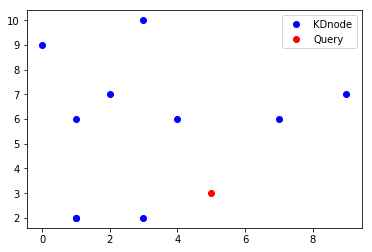

In [153]:
from queue import PriorityQueue
from matplotlib import pyplot as plt
import math
import random

def nth_element(a,l,r,k):
    #[l,r)
    pos = l
    for i in range(l,r-1):
        if a[i]<=a[r-1]:
            a[pos],a[i]=a[i],a[pos]
            pos = pos+1
    a[pos],a[r-1]=a[r-1],a[pos]
    cnt = pos-l+1
    if cnt == k:
        return a[pos]
    elif cnt>k:
        return nth_element(a,l,pos,k)
    return nth_element(a,pos+1,r,k-cnt)

def PQprint(pq):
    if pq.empty():
        return
    x = pq.get()
    PQprint(pq)
    print("point:(%d,%d),id:%d,distance:%.5f"%(x.x.x[0],x.x.x[1],x.x.id,math.sqrt(x.y)))
    
class PQnode():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __lt__(self,other):
        return self.y > other.y
    
class KDnode():
    def __init__(self,x,id):
        self.x = x
        self.id = id
        self.dis = 0
    def __le__(self,y):
        return self.x[cmp]<=y.x[cmp]
    def distance(self,y):
        ret = 0
        for i in range(len(self.x)):
            ret = ret + (self.x[i]-y.x[i])*(self.x[i]-y.x[i])
        return ret
    
class KDT():
    def __init__(self,x,dims):
        self.dims = dims
        self.tree = x
        self.dis = None
        self.cnt = 0
        self.nearest = PriorityQueue()
    
    def build(self,l,r,d):
        if l>=r:
            return
        global cmp
        cmp = d % self.dims
        mid = (l + r) //2
        nth_element(self.tree,l,r+1,mid-l+1)
        self.build(l,mid-1,d+1)
        self.build(mid+1,r,d+1)
    
    def preorder(self,l,r):
        #just for test
        if l > r:
            return
        mid = (l+r)//2
        print(self.tree[mid].x[0],self.tree[mid].x[1],self.tree[mid].id)
        self.preorder(l,mid-1)
        self.preorder(mid+1,r)
        
    def search(self,x,k):
        while not self.nearest.empty():
            self.nearest.get()
        self.cnt = 0
        def dfs(l,r,d):
            if l>r:
                return
            mid = (l+r)//2
            self.tree[mid].dis = x.distance(self.tree[mid])

            cmp = d % self.dims
            
            f = x.x[cmp] - self.tree[mid].x[cmp]
            if f <= 0:
                dfs(l,mid-1,d+1)
            else:
                dfs(mid+1,r,d+1)
                
            if self.cnt < k:
                self.nearest.put(PQnode(self.tree[mid],self.tree[mid].dis))
                self.cnt = self.cnt + 1
            elif self.dis > self.tree[mid].dis:
                self.nearest.get()
                self.nearest.put(PQnode(self.tree[mid],self.tree[mid].dis))
                
            temp = self.nearest.get()
            self.dis = x.distance(temp.x)
            self.nearest.put(temp)
            
            if self.cnt < k or self.dis > f*f:
                if f<=0:
                    dfs(mid+1,r,d+1)
                else:
                    dfs(l,mid-1,d+1)
                    
        dfs(0,len(self.tree)-1,0)
        return self.nearest
            
if __name__ == "__main__":
    #for convenience and plot, dims = 2
    a = []
    for i in range(10):
        a.append(KDnode([random.randint(0,10),random.randint(0,10)],i))
    
    my_kd = KDT(a,2)
    my_kd.build(0,len(my_kd.tree)-1,0)
    #my_kd.preorder(0,len(my_kd.tree)-1)
    Query = KDnode([random.randint(0,10),random.randint(0,10)],-1)
    
    print("Query point:(%d,%d)"%(Query.x[0],Query.x[1]))
    cnt = 5
    ret = my_kd.search(Query,cnt)
    print("The %d cloest points are:"%cnt)
    PQprint(ret)
    
    plt.plot(list(map(lambda x: x.x[0],a)),list(map(lambda x: x.x[1],a)),'bo',label='KDnode')
    plt.plot(Query.x[0],Query.x[1],'ro',label='Query')
    plt.legend()
    plt.show()